# **Notebook Information**
- **Name:** Geron Simon A. Javier
- **Y&S:** BSCS 3B IS
- **Course:** CSST 101 | Advanced Representation and Reasoning
- **Topic:** Module 2.0: Probabilistic Reasoning in AI
- **Due date:** N/A

### **Exercise 1: Setting Up the Environment**

In [1]:
# Install required library
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.2 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator
import networkx as nx
import matplotlib.pyplot as plt

### **Exercise 2: Building a Simple Bayesian Network**


In [3]:
# Define the structure
model = BayesianNetwork([('Weather', 'Traffic'), ('Traffic', 'Late')])

# Define Conditional Probability Tables (CPTs)
cpd_weather = TabularCPD(variable='Weather', variable_card=2, values=[[0.7], [0.3]])
cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                         values=[[0.8, 0.3],
                                 [0.2, 0.7]],
                         evidence=['Weather'],
                         evidence_card=[2])
cpd_late = TabularCPD(variable='Late', variable_card=2,
                      values=[[0.9, 0.6],
                              [0.1, 0.4]],
                      evidence=['Traffic'],
                      evidence_card=[2])

# Add CPDs to the model
model.add_cpds(cpd_weather, cpd_traffic, cpd_late)



### **Exercise 3: Querying the Bayesian Network**

In [4]:
# Perform exact inference
infer = VariableElimination(model)
result = infer.query(['Late'], evidence={'Weather': 1})  # 1 represents Rainy
print("Probability of being Late given that it's Rainy:")
print(result)



Probability of being Late given that it's Rainy:
+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6900 |
+---------+-------------+
| Late(1) |      0.3100 |
+---------+-------------+


### **Exercise 4: Parameter Learning**

In [5]:
# Simulate a dataset
np.random.seed(42)
n_samples = 1000
weather = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
traffic = np.where(weather == 0,
                   np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2]),
                   np.random.choice([0, 1], size=n_samples, p=[0.3, 0.7]))
late = np.where(traffic == 0,
                np.random.choice([0, 1], size=n_samples, p=[0.9, 0.1]),
                np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4]))

data = pd.DataFrame({'Weather': weather, 'Traffic': traffic, 'Late': late})

# Estimate parameters
mle = MaximumLikelihoodEstimator(model, data)
cpd_traffic_mle = mle.estimate_cpd('Traffic')
cpd_late_mle = mle.estimate_cpd('Late')

print("Estimated CPD for Traffic:")
print(cpd_traffic_mle)
print("\nEstimated CPD for Late:")
print(cpd_late_mle)



Estimated CPD for Traffic:
+------------+---------------------+--------------------+
| Weather    | Weather(0)          | Weather(1)         |
+------------+---------------------+--------------------+
| Traffic(0) | 0.7865168539325843  | 0.2951388888888889 |
+------------+---------------------+--------------------+
| Traffic(1) | 0.21348314606741572 | 0.7048611111111112 |
+------------+---------------------+--------------------+

Estimated CPD for Late:
+---------+---------------------+---------------------+
| Traffic | Traffic(0)          | Traffic(1)          |
+---------+---------------------+---------------------+
| Late(0) | 0.9209302325581395  | 0.6084507042253521  |
+---------+---------------------+---------------------+
| Late(1) | 0.07906976744186046 | 0.39154929577464787 |
+---------+---------------------+---------------------+


### **Exercise 5: Visualizing the Bayesian Network**

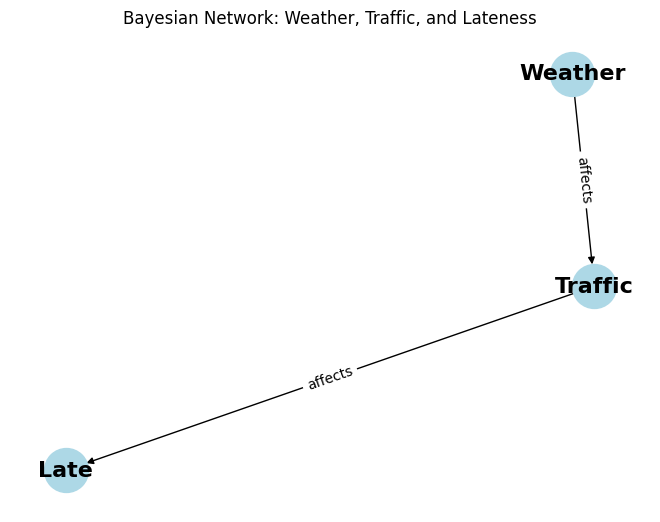

In [6]:
# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=1000, font_size=16, font_weight='bold')
edge_labels = {('Weather', 'Traffic'): 'affects', ('Traffic', 'Late'): 'affects'}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Bayesian Network: Weather, Traffic, and Lateness")
plt.axis('off')
plt.show()